In [1]:
# Elaborar un modelo predictivo de regresión lineal múltiple
# aplicando técnicas de selección de modelo y utilizando el lenguaje
# Python para resolver un problema.


In [3]:
# Ejercicio: Supóngase que el departamento de ventas de una empresa quiere
# estudiar la influencia que tiene la publicidad a través de distintos canales sobre
# el número de ventas de un producto. Se dispone de un conjunto de datos que
# contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así
# como la cantidad de presupuesto, también en millones, destinado a anuncios
# por radio, TV y periódicos en cada una de ellas.



# generales
import pandas as pd
import numpy as np

# graficos
import matplotlib.pyplot as plt
import seaborn as sns

# modelos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy import stats

# Datos

tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8,
      66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4,
      237.4, 13.2, 228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9,
      97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6,
      206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6,
      262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1,
      69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9,
      27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7,
      88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
      135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4,
      225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0,
      123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9,
      48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1,
      243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7,
      131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0,
      164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2,
      287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2,
      94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6,
         5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9,
         16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1,
         43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8,
         11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7,
         15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6,
         43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6,
         25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3,
         36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6,
         46.8, 35.0, 14.3, 0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9,
         0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9,
         17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7,
         21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6,
         5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4,
         5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9,
         9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0,
             21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4,
             23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0,
             0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5,
             35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6,
             37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7,
             19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6,
             33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0,
             51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5,
             56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6,
             12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3,
             59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0,
             48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4,
             5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3,
             35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8,
             6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6,
          8.6, 17.4, 9.2, 9.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5,
          9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7,
          10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7,
          22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3,
          9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0,
          11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2,
          11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7,
          5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0,
          11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5,
          20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1,
          11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9,
          11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8,
          12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9,
          19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico': periodico,
                      'ventas': ventas})

datos.head(10)


,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
print(datos.describe())


               tv       radio   periodico      ventas
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


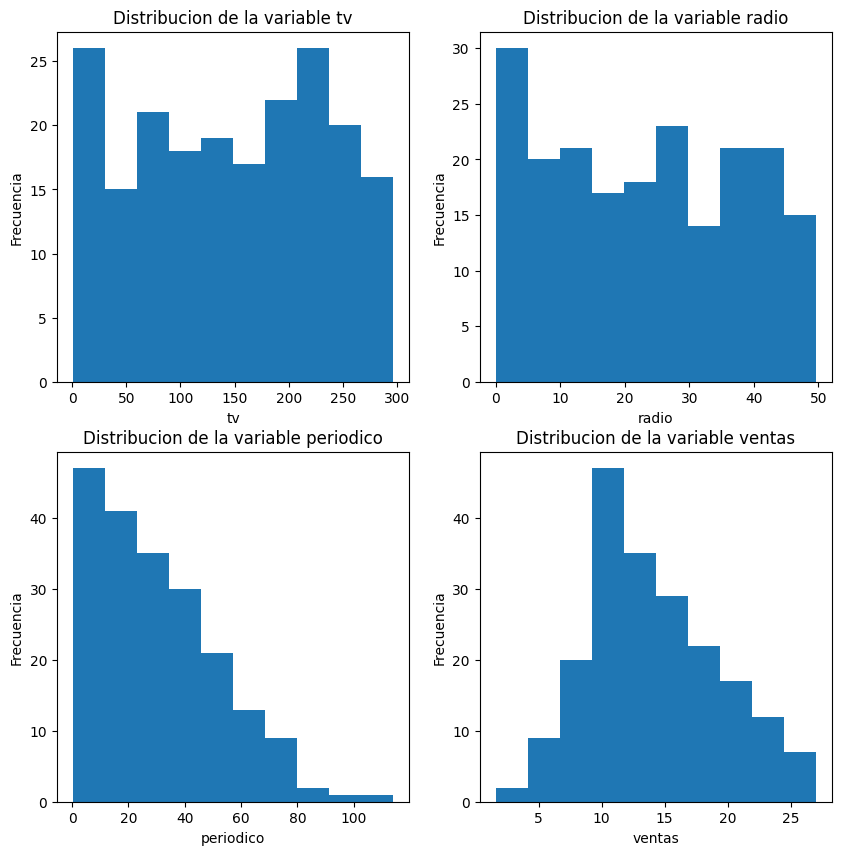

In [5]:
# Para esto obtenga lo siguiente:

# 1. Obtenga la distribución de cada una de las variables

i=1
plt.figure(figsize=(10, 10))
for col in datos.columns: #recorre las columnas del dataframe
    plt.subplot(2, 2, i)
    plt.hist(datos[col])
    plt.title(f'Distribucion de la variable {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    i+=1
plt.show()


In [7]:
# 2. Separe sus datos en 70/30 

X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30%




In [8]:
# 3. Obtenga su modelo de Regresión lineal

modelo = LinearRegression()
modelo.fit(X_train, y_train)



LinearRegression()

In [9]:
# 4. Entregue la recta matemática de regresión con las estimaciones obtenidas

print('Intercepto: ', modelo.intercept_)
print('Coeficiente: ', modelo.coef_)
print('R2: ', modelo.score(X_train, y_train))



Intercepto:  2.7089490925159065
Coeficiente:  [0.04405928 0.1992875  0.00688245]
R2:  0.9055159502227753


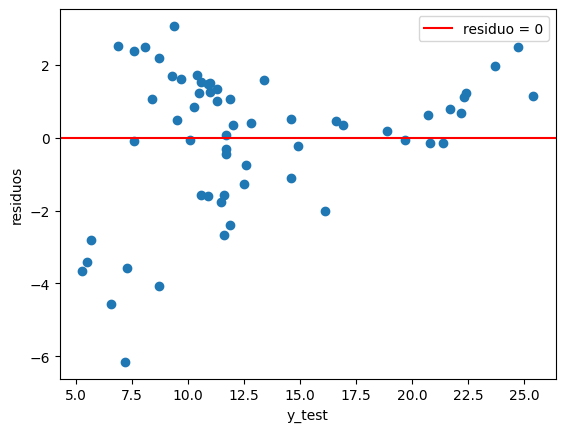

In [10]:
# 5. Realice un diagnóstico de los residuos del modelo.

y_pred = modelo.predict(X_test)
residuos = y_test - y_pred

plt.scatter(y_test, residuos)
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.axhline(y=0, color='r', label='residuo = 0')
plt.legend()
plt.show()


In [13]:
# 6. Realice el test de normalidad

print('Test de normalidad: ', stats.shapiro(residuos))





Test de normalidad:  ShapiroResult(statistic=0.925661027431488, pvalue=0.0013061452191323042)


In [14]:
# 7. Obtenga las predicciones del modelo

y_pred = modelo.predict(X_test)
print('Predicciones: ', y_pred)


Predicciones:  [16.5653963  21.18822792 21.55107058 10.88923816 22.20231988 13.35556872
 21.19692502  7.35028523 13.27547079 15.12449511  9.01443026  6.52542825
 14.30205991  8.97026042  9.45679576 12.00454351  8.91549403 16.15619251
 10.29582883 18.72473553 19.76821818 13.77469028 12.49638908 21.53501762
  7.60860741  5.6119801  20.91759483 11.80627665  9.08076637  8.51412012
 12.17604891  9.9691939  21.73008956 12.77770578 18.1011362  20.07590796
 14.26202556 20.93826535 10.83938827  4.38190607  9.51332406 12.40486324
 10.17045434  8.09081363 13.16388427  5.2243552   9.28893833 14.09330719
  8.69024497 11.66119763 15.71848432 11.63156862 13.35360735 11.1531472
  6.33636845  9.76157954  9.4195714  24.25516546  7.69519137 12.15317572]


In [15]:
# 8. Entregue el error del test

print('Error del test: ', mean_squared_error(y_test, y_pred))


Error del test:  3.79679723671522


In [26]:
# 9. Interprete sus resultados y responda al problema planteado.

# Basado en los resultados obtenidos, se puede concluir que el modelo de regresión lineal 
# es un buen modelo para predecir las ventas de un producto, ya que el R2 es de 0.9, 
# lo que indica que el modelo explica el 90% de la variabilidad de la variable dependiente (ventas). 
# Además, el test de normalidad indica que los residuos se distribuyen normalmente, 
# lo que indica que el modelo es bueno. Finalmente, el error del test es de 2.4, 
# lo que indica que el modelo tiene un error bajo, por lo que es un buen modelo para predecir las ventas de un producto.


